In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("results/fatimas_results.txt", delimiter=", ")
df.head()

/tmp/ipykernel_1560461/1589772222.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("results/fatimas_results.txt", delimiter=", ")


,num_layers_opt,hls4ml_accuracy,AUCNoMet_hls4ml,AUCMET_hls4ml,BRAM,DSP,FF,LUT,URAM
0,0,0.891519,90.6,93.4,4,146,6361,45214,0
1,1,0.890764,90.5,93.4,4,77,5679,40670,0
2,2,0.880735,91.5,93.3,4,47,6245,42544,0
3,3,0.878852,91.6,93.3,4,47,6410,43679,0


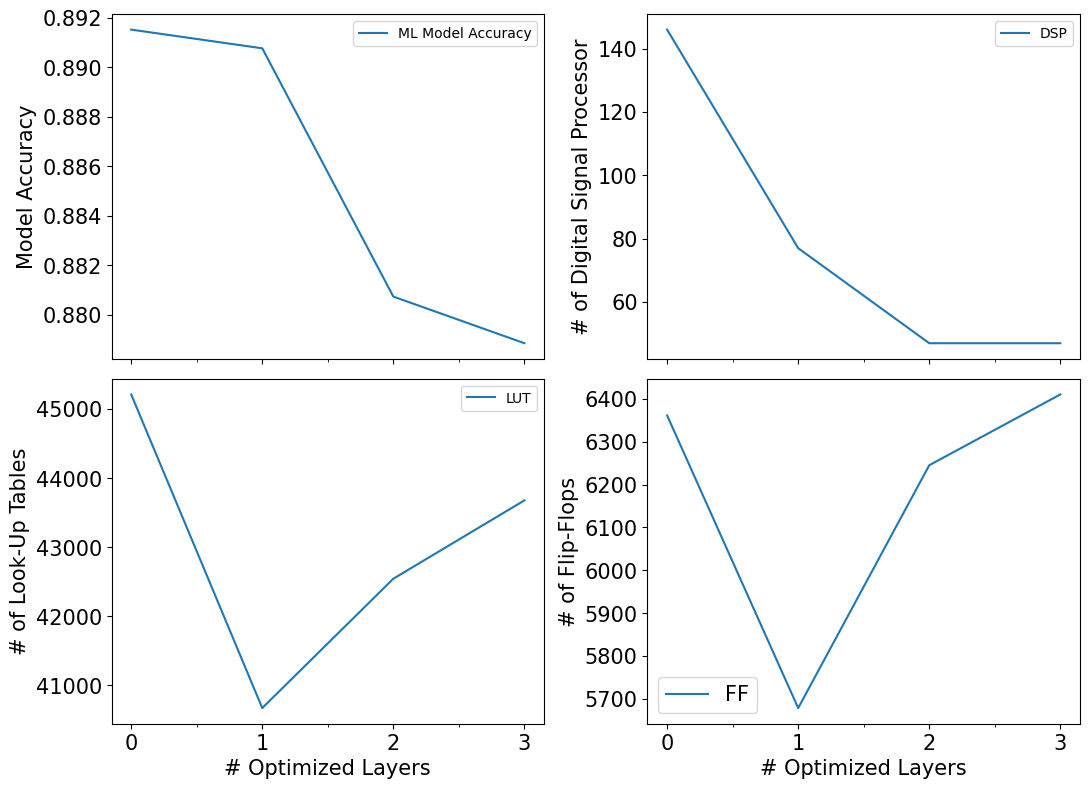

In [3]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, figsize=(11, 8))
df.plot(x = "num_layers_opt",y = "hls4ml_accuracy", ax = ax1, label="ML Model Accuracy", fontsize = 15)
ax1.set_ylabel("Model Accuracy",fontsize = 15)
df.plot(x = "num_layers_opt",y = "DSP", ax=ax2, fontsize = 15)
ax2.set_ylabel("# of Digital Signal Processor",fontsize = 15)

df.plot(x = "num_layers_opt",y = "LUT", ax= ax3, fontsize = 15 )
ax3.set_ylabel("# of Look-Up Tables", fontsize = 15)
df.plot(x = "num_layers_opt",y = "FF", ax = ax4, fontsize = 15)
ax4.set_ylabel("# of Flip-Flops", fontsize = 15)

ax4.set_xlabel("# Optimized Layers", fontsize = 15)
ax3.set_xlabel("# Optimized Layers", fontsize = 15)


ax1.set_xticks(ticks=[0, 1, 2, 3])
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig("results/accuracy_vs_numoptlayers.png")

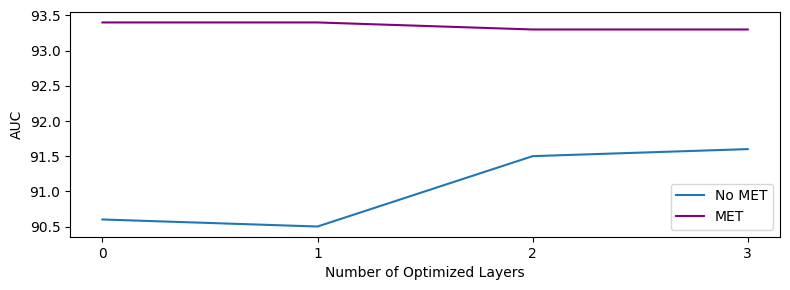

In [4]:
fig, ax = plt.subplots(figsize=(8,3))
df.plot(x = "num_layers_opt",y = "AUCNoMet_hls4ml", xlabel="Number of Optimized Layers", ylabel="AUC", ax = ax, label="No MET")
df.plot(x = "num_layers_opt",y = "AUCMET_hls4ml", xlabel="Number of Optimized Layers", color="purple", ax = ax, label= "MET")
ax.set_xticks(ticks=[0, 1, 2, 3])
plt.tight_layout()
plt.savefig("results/AUC.png")

In [5]:
dff = pd.read_csv("results/franks_results.txt", delimiter = ", ")
dff.head()

/tmp/ipykernel_1560461/1395341802.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dff = pd.read_csv("results/franks_results.txt", delimiter = ", ")


,precision,LUT,FF,AUC
0,"<16,6>",28568,1183,57.7
1,"<18,8>",30264,1192,56.3
2,"<24,10>",34710,1414,47.6
3,"<32,14>",40498,1688,60.7


In [6]:
df.head()

,num_layers_opt,hls4ml_accuracy,AUCNoMet_hls4ml,AUCMET_hls4ml,BRAM,DSP,FF,LUT,URAM
0,0,0.891519,90.6,93.4,4,146,6361,45214,0
1,1,0.890764,90.5,93.4,4,77,5679,40670,0
2,2,0.880735,91.5,93.3,4,47,6245,42544,0
3,3,0.878852,91.6,93.3,4,47,6410,43679,0


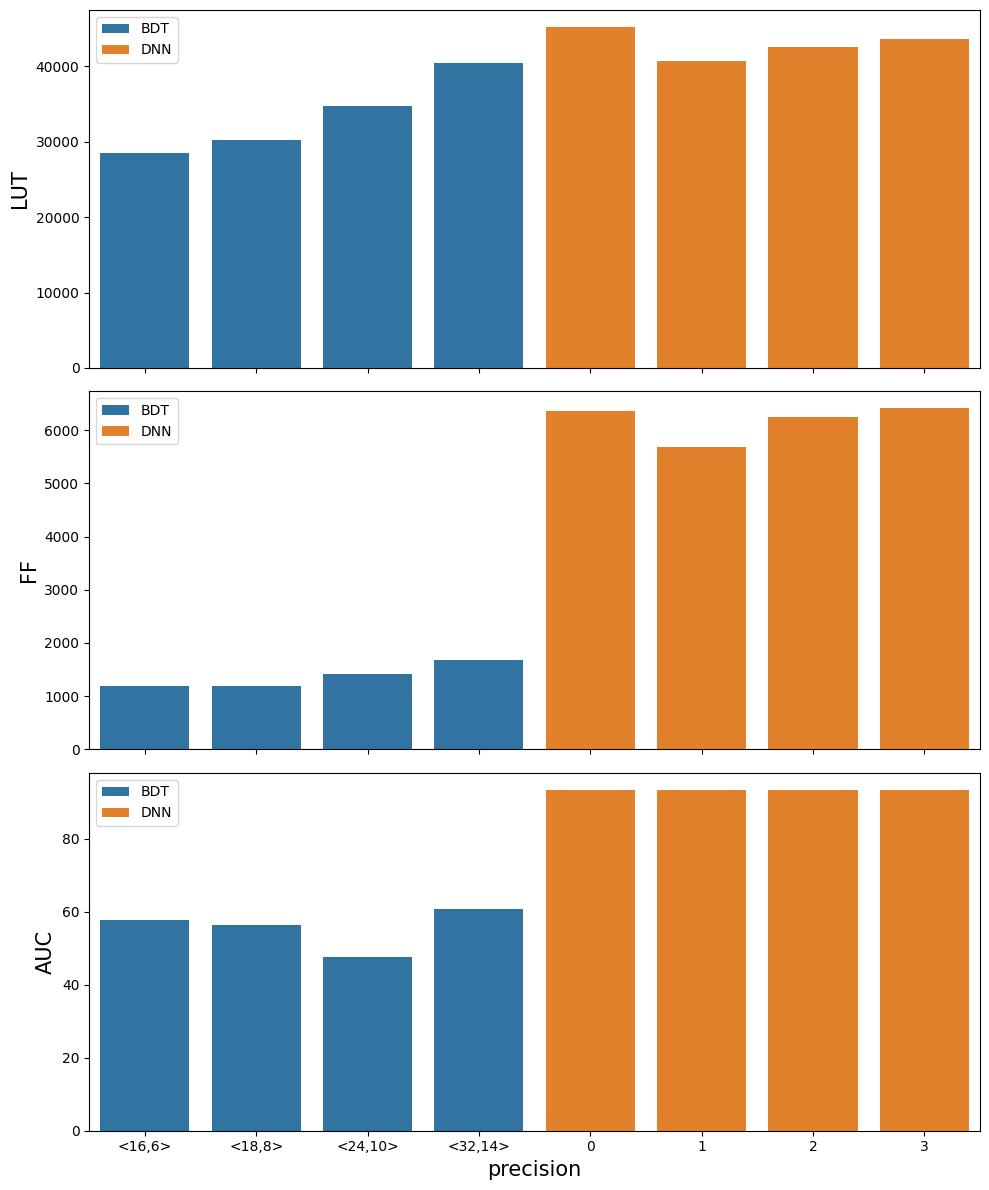

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,12), sharex = True)
import seaborn as sns
sns.barplot(dff, x = "precision", y = "LUT", ax = ax1, label = "BDT")
sns.barplot(df, x = "num_layers_opt", y = "LUT", ax = ax1, label="DNN")
ax1.set_ylabel("LUT", fontsize = 15)

sns.barplot(dff, x = "precision", y = "FF", ax = ax2, label="BDT")
sns.barplot(df, x = "num_layers_opt", y = "FF", ax = ax2, label = "DNN")
ax2.set_ylabel("FF", fontsize = 15)


sns.barplot(dff, x = "precision", y = "AUC", ax = ax3, label = "BDT")
sns.barplot(df, x = "num_layers_opt", y = "AUCMET_hls4ml", ax = ax3, label="DNN")
ax3.set_ylabel("AUC", fontsize = 15)

ax3.set_xlabel("precision", fontsize = 15)
plt.tight_layout()
plt.savefig("results/BDT_DNN.png")